In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bubblewrap as bw
import bubblewrap.input_sources.functional as fin
import tqdm as tqdm

## Define Datasets

## Buzaki

In [2]:
obs, raw_behavior, bin_centers, beh_t = fin.construct_buzaki_data(fin.datasets["buzaki"][0], 0.03)

In [3]:
resampled_behavior = fin.resample_behavior(raw_behavior, bin_centers, beh_t)
hd = np.arctan2(resampled_behavior[:,0] - resampled_behavior[:,2], resampled_behavior[:,1] - resampled_behavior[:,3])
beh = resampled_behavior[:,:2]

In [5]:
datasets = {
    's(obs,3)': fin.prosvd_data(obs, 3, 30),
    's(obs,1)': fin.prosvd_data(obs, 1, 30),
    'pos': beh,
    's(pos,1)': fin.prosvd_data(fin.zscore(beh, 10), 1, 20),
    'hd': hd.reshape(-1,1),
    's([obs,beh],5)': fin.prosvd_data(np.hstack([obs[10:], fin.zscore(beh, 10)]), 5, 20),
    's([obs,beh],1)': fin.prosvd_data(np.hstack([obs[10:], fin.zscore(beh, 10)]), 1, 20),
}

keys = list(datasets.keys())


100%|████████████████████████████████████████| 745784/745784 [00:34<00:00, 21397.62it/s]


In [6]:
input_keys = 's(obs,3) s(obs,1) pos s(pos,1) s([obs,beh],1) s([obs,beh],5)'.split(" ")
output_keys = 's(obs,1) hd s([obs,beh],1)'.split(" ")

## Indy

In [3]:
obs, raw_behavior, bin_centers, beh_t = fin.construct_indy_data(fin.datasets["indy"][0])

In [4]:
resampled_behavior = fin.resample_behavior(raw_behavior, bin_centers, beh_t)
beh = resampled_behavior

In [5]:
pre_datasets = {
    's(obs,3) # i': fin.prosvd_data(obs, 3, 30),
    's(z(obs),3) # i': fin.prosvd_data(fin.zscore(obs, 10), 3, 30),
    's(obs,1) # o': fin.prosvd_data(obs, 1, 30),
    'beh # i': beh,
    'z(beh) # i': fin.zscore(beh, 10),
    's(z(beh),1) # o': fin.prosvd_data(fin.zscore(beh, 10), 1, 20),
    's(z([obs,beh]),5) # i': fin.prosvd_data(fin.zscore(np.hstack([obs, beh])), 5, 20),
    's(z([obs,beh]),1) # o': fin.prosvd_data(fin.zscore(np.hstack([obs, beh])), 1, 20),
}


100%|██████████████████████████████████████████| 27240/27240 [00:01<00:00, 21180.10it/s]


## Fly

In [2]:
obs, raw_behavior, bin_centers, beh_t = fin.construct_fly_data(fin.datasets["fly"][0])

/home/jgould/miniconda3/envs/bw2/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/bw2/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/bw2/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [3]:
resampled_behavior = fin.resample_behavior(raw_behavior, bin_centers, beh_t)
beh = resampled_behavior

In [4]:
pre_datasets = {
    's(obs,3) # i': fin.prosvd_data(obs, 3, 30),
    's(z(obs),3) # i': fin.prosvd_data(fin.zscore(obs, 10), 3, 30),
    's(obs,1) # o': fin.prosvd_data(obs, 1, 30),
    'beh # i': beh,
    'z(beh) # i': fin.zscore(beh, 10),
    's(z(beh),1) # o': fin.prosvd_data(fin.zscore(beh, 10), 1, 20),
    's(z([obs,beh]),5) # i': fin.prosvd_data(fin.zscore(np.hstack([obs, beh])), 5, 20),
    's(z([obs,beh]),1) # o': fin.prosvd_data(fin.zscore(np.hstack([obs, beh])), 1, 20),
}

100%|██████████████████████████████████████████| 11645/11645 [00:00<00:00, 19386.91it/s]


## Musal

In [2]:
ca, vid, t_ca, t_vid = fin.generate_musal_dataset(cam=1, video_target_dim=100, resize_factor=1, prosvd_init_size=100)

In [12]:
%matplotlib qt
plt.plot(np.diff(t_ca))

In [4]:
pre_datasets = {
    's(obs,3) # i': fin.prosvd_data(obs, 3, 30),
    's(z(obs),3) # i': fin.prosvd_data(fin.zscore(obs, 10), 3, 30),
    's(obs,1) # o': fin.prosvd_data(obs, 1, 30),
    'beh # i': beh,
    'z(beh) # i': fin.zscore(beh, 10),
    's(z(beh),1) # o': fin.prosvd_data(fin.zscore(beh, 10), 1, 20),
    's(z([obs,beh]),5) # i': fin.prosvd_data(fin.zscore(np.hstack([obs, beh])), 5, 20),
    's(z([obs,beh]),1) # o': fin.prosvd_data(fin.zscore(np.hstack([obs, beh])), 1, 20),
}

100%|██████████████████████████████████████████| 11645/11645 [00:00<00:00, 19386.91it/s]


## For all

In [5]:
datasets = {}
input_keys = []
output_keys = []
for key, value in pre_datasets.items():
    k, tags = key.split("#")
    k = k.strip()
    datasets[k] = value
    if "i" in tags:
        input_keys.append(k)
    if "o" in tags:
        output_keys.append(k)

# Run stuff

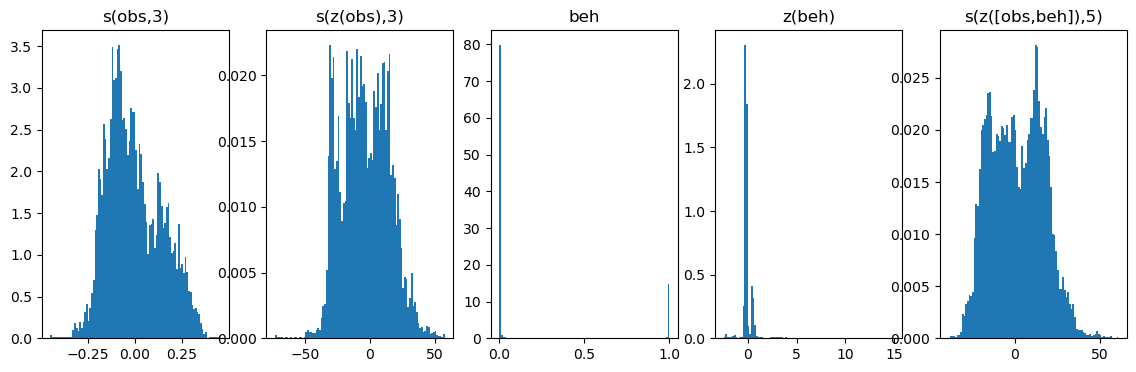

In [6]:
fig, ax = plt.subplots(ncols=len(input_keys), figsize=(14,4))
for i, key in enumerate(input_keys):
    ax[i].hist(datasets[key].flatten(), bins=100, density=True)
    ax[i].set_title(key)

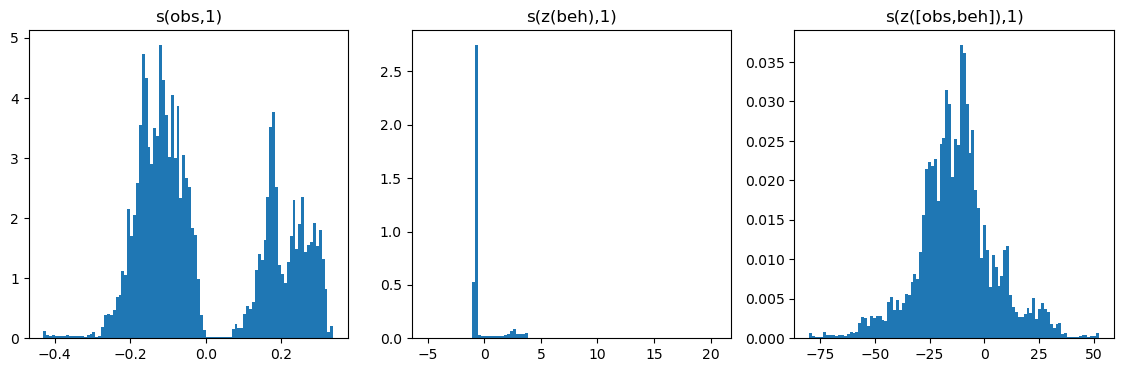

In [7]:
fig, ax = plt.subplots(ncols=len(output_keys), figsize=(14,4))
for i, key in enumerate(output_keys):
    ax[i].hist(datasets[key].flatten(), bins=100, density=True)
    ax[i].set_title(key)

## Run table

In [12]:
def evaluate(i,o, auto_reg=False, maxlen=30_000):
    i, o = fin.clip(i,o,  maxlen=30_000)
    
    br = bw.bw_run.simple_bw_run(input_array=i, bw_params= bw.default_parameters.default_jpca_dataset_parameters, time_offsets=[0,1])
    
    alpha_dict = br.alpha_history
    a_current, a_ahead, o = fin.clip(alpha_dict[0], alpha_dict[1], o,)
    reg = bw.SymmetricNoisyRegressor(input_d=a_current.shape[1], output_d=o.shape[1], init_min_ratio=5)
    
    pred, true = br.evaluate_regressor(reg, o)
    return br, pred, true


In [13]:
results = {}
brs = {}
true_values = {}
for okey in output_keys:
    results[okey] = {}
    brs[okey] = {}
    for ikey in input_keys:
        print(f"{okey= } {ikey= }")
        
        br, pred, true = evaluate(datasets[ikey], datasets[okey])
        
        results[okey][ikey] = pred
        brs[okey][ikey] = br
        
        if okey not in true_values:
            true_values[okey] = true

okey= 's(obs,1)' ikey= 's(obs,3)'
okey= 's(obs,1)' ikey= 's(z(obs),3)'
okey= 's(obs,1)' ikey= 'beh'
okey= 's(obs,1)' ikey= 'z(beh)'
okey= 's(obs,1)' ikey= 's(z([obs,beh]),5)'
okey= 's(z(beh),1)' ikey= 's(obs,3)'
okey= 's(z(beh),1)' ikey= 's(z(obs),3)'
okey= 's(z(beh),1)' ikey= 'beh'
okey= 's(z(beh),1)' ikey= 'z(beh)'
okey= 's(z(beh),1)' ikey= 's(z([obs,beh]),5)'
okey= 's(z([obs,beh]),1)' ikey= 's(obs,3)'
okey= 's(z([obs,beh]),1)' ikey= 's(z(obs),3)'
okey= 's(z([obs,beh]),1)' ikey= 'beh'
okey= 's(z([obs,beh]),1)' ikey= 'z(beh)'
okey= 's(z([obs,beh]),1)' ikey= 's(z([obs,beh]),5)'


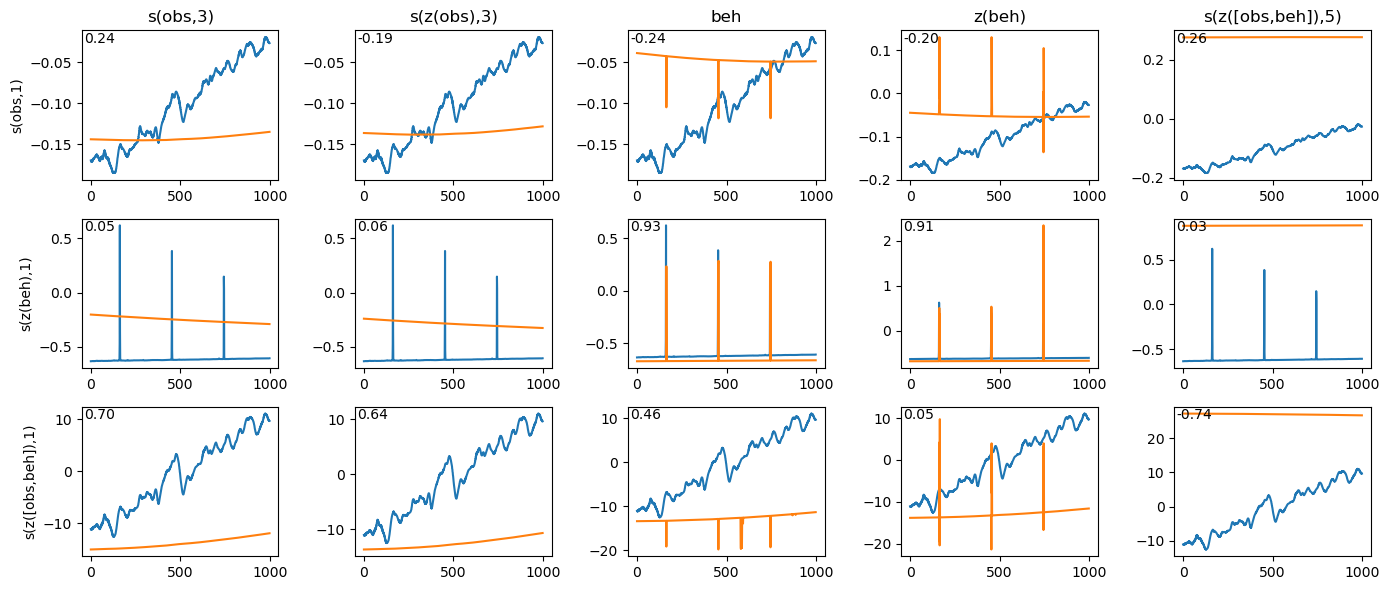

In [20]:
fig, ax = plt.subplots(nrows=len(output_keys), ncols=len(input_keys), figsize=(14,2*len(output_keys)), layout='tight')

s = slice(-1000,-1)

for row, okey in enumerate(output_keys):
    ax[row,0].set_ylabel(okey)
    for col, ikey in enumerate(input_keys):
        true, predicted = fin.clip(true_values[okey], results[okey][ikey])
        
        if 1:
            ax[row,col].plot(true[s])
            ax[row,col].plot(predicted[s])
        else:
            ax[row,col].plot(predicted[s]-true[s])
            ax[row,col].set_ylim((true.max() - true.min()) * np.array([-.5, .5]))
            # ax[row,col].plot()
        
        halfway = len(true)//2
        
        corrs = " ".join([f"{np.corrcoef(true[halfway:,j], predicted[halfway:,j])[0,1]:.2f}" for j in range(true.shape[1])])
        ax[row,col].text(.01,.99, corrs, ha='left', va='top', transform=ax[row, col].transAxes)
        if row == 0:
            ax[0,col].set_title(ikey)

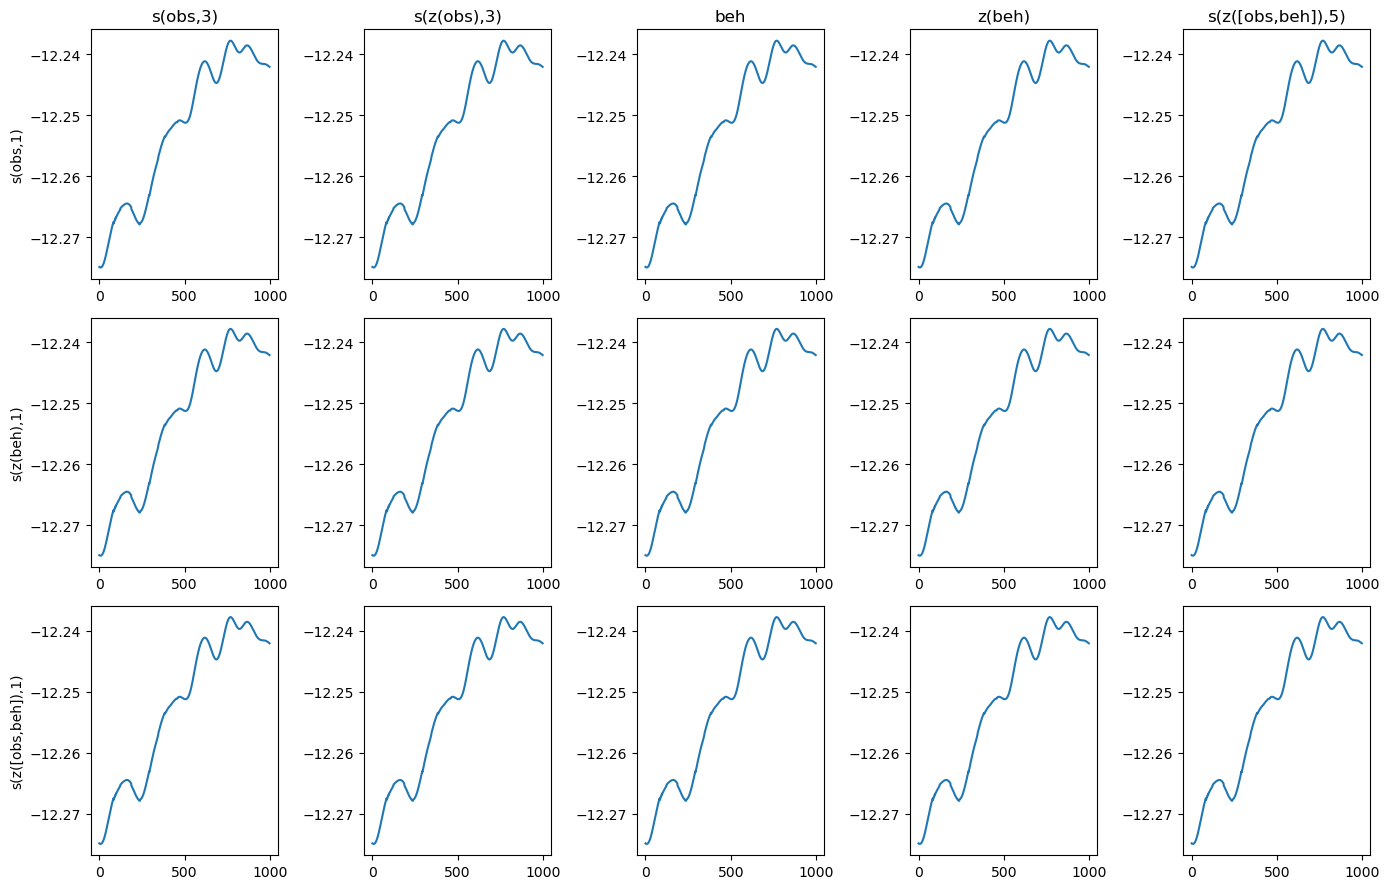

In [19]:
fig, ax = plt.subplots(nrows=len(output_keys), ncols=len(input_keys), figsize=(14,3*len(output_keys)), layout='tight')

s = slice(-1000,-1)

for row, okey in enumerate(output_keys):
    ax[row,0].set_ylabel(okey)
    for col, ikey in enumerate(input_keys):
        if row == 0:
            ax[0,col].set_title(ikey)
        
        brs[okey][ikey]
        
        true, predicted = fin.clip(true_values[okey], results[okey][ikey])
        
        ax[row,col].plot(br.prediction_history[0][s])
        
#         halfway = len(true)//2
        
#         corrs = " ".join([f"{np.corrcoef(true[halfway:,j], predicted[halfway:,j])[0,1]:.2f}" for j in range(true.shape[1])])
#         ax[row,col].text(.01,.99, corrs, ha='left', va='top', transform=ax[row, col].transAxes)


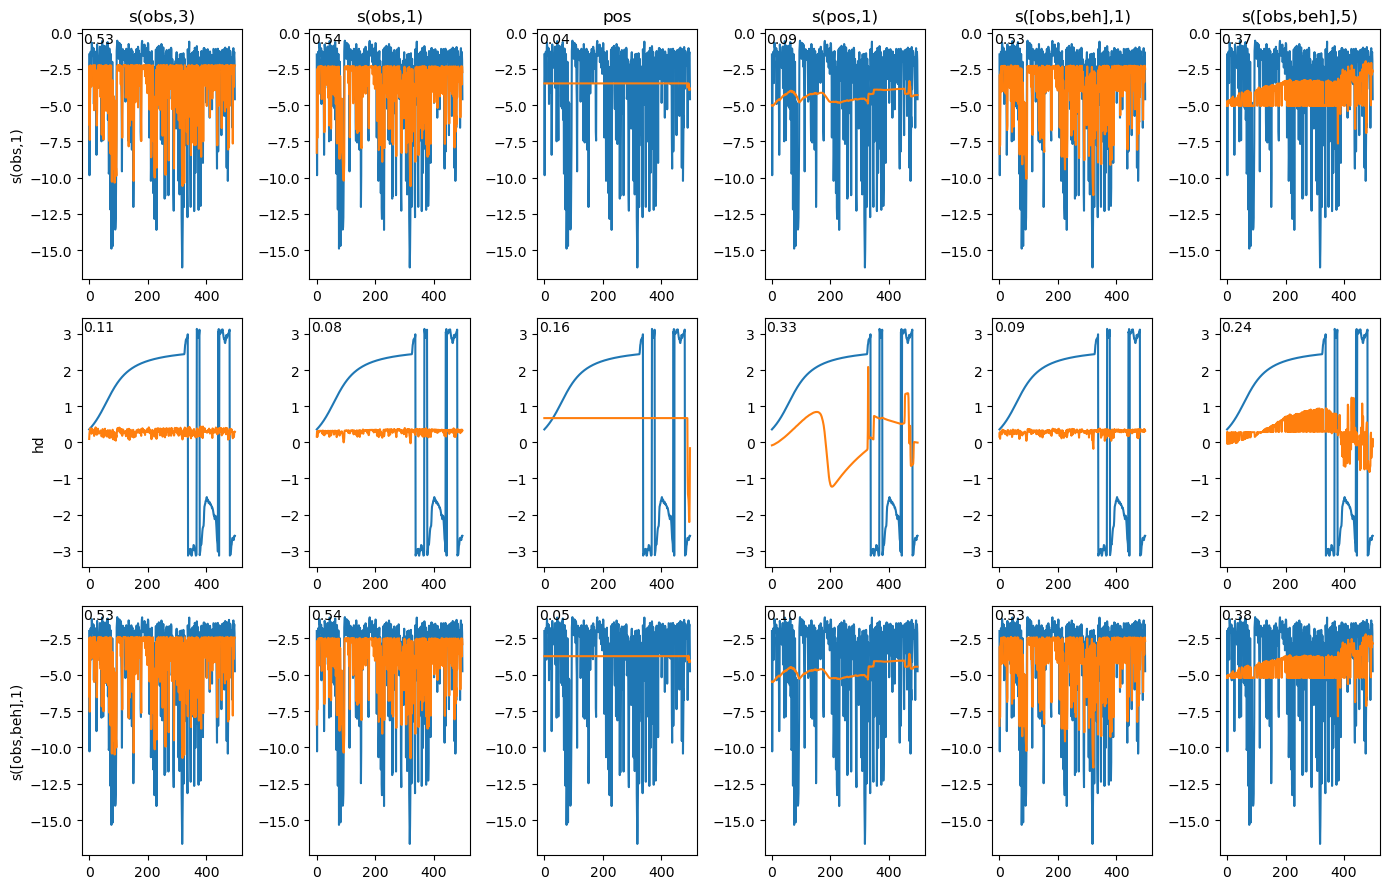

In [11]:
fig, ax = plt.subplots(nrows=len(output_keys), ncols=len(input_keys), figsize=(14,3*len(output_keys)), layout='tight')

s = slice(-500,-1)

for row, okey in enumerate(output_keys):
    ax[row,0].set_ylabel(okey)
    for col, ikey in enumerate(input_keys):
        true, predicted = fin.clip(true_values[okey], results[okey][ikey])
        
        if 1:
            ax[row,col].plot(true[s])
            ax[row,col].plot(predicted[s])
        else:
            ax[row,col].plot(predicted[s]-true[s])
            ax[row,col].set_ylim((true.max() - true.min()) * np.array([-.5, .5]))
            # ax[row,col].plot()
        
        halfway = len(true)//2
        
        corrs = " ".join([f"{np.corrcoef(true[halfway:,j], predicted[halfway:,j])[0,1]:.2f}" for j in range(true.shape[1])])
        ax[row,col].text(.01,.99, corrs, ha='left', va='top', transform=ax[row, col].transAxes)
        if row == 0:
            ax[0,col].set_title(ikey)

#     pred = bslice[i].behavior_pred_history[1][-1000:]
#     err = np.squeeze(bslice[i].behavior_error_history[1][-1000:])
    
#     true = pred-err

#     ax[c,r].plot(true)
#     ax[c,r].plot(pred)
#     
    
#     if c == 0:
#         ax[c,r].set_title(input_keys[r])
#     if r == 0:
#         ax[c,r].set_ylabel(output_keys[c])

## Compare temporal resolutions

100%|██████████████████████████████████████████| 27246/27246 [00:01<00:00, 17689.57it/s]


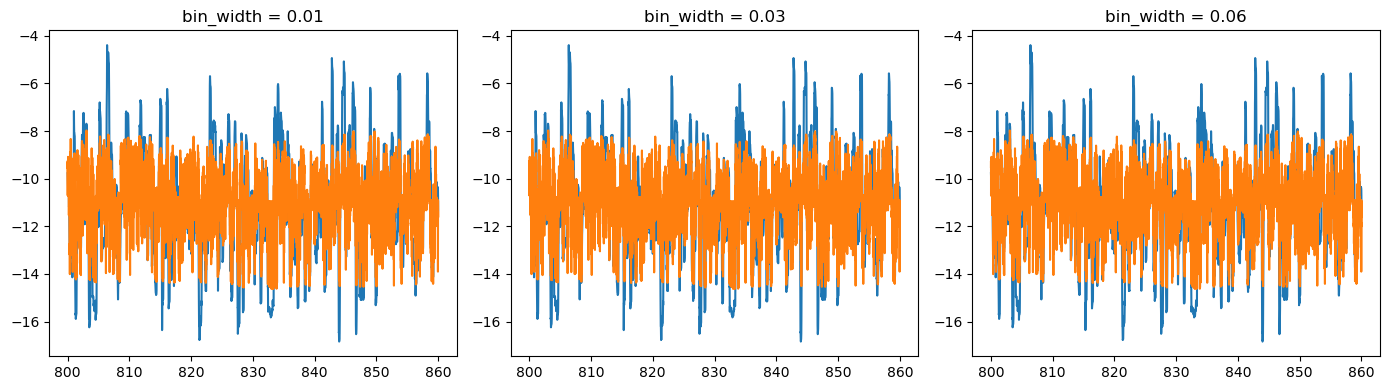

In [67]:
bin_widths = [.01, .03, .06]

fig, ax = plt.subplots(nrows=1, ncols=len(bin_widths), figsize=(14,4*1), layout='tight')

for idx, bin_width in enumerate(bin_widths):
    obs, raw_behavior, bin_centers, t = fin.construct_indy_data(fin.datasets["indy"][0])
    beh = fin.resample_behavior(raw_behavior, bin_centers, t)
    i = fin.prosvd_data(np.hstack([obs[10:], fin.zscore(beh, 10)]), 5, 20)
    o = fin.prosvd_data(beh, 1, 20)
    predicted, true = evaluate(i, o)
    predicted, true, t = fin.clip(predicted, true, t)
    
    mask = (800 < t) & (t < 860)
    ax[idx].plot(t[mask], true[mask])
    ax[idx].plot(t[mask], predicted[mask])
    ax[idx].set_title(f"{bin_width = }")

100%|██████████████████████████████████████████| 27246/27246 [00:01<00:00, 18400.17it/s]


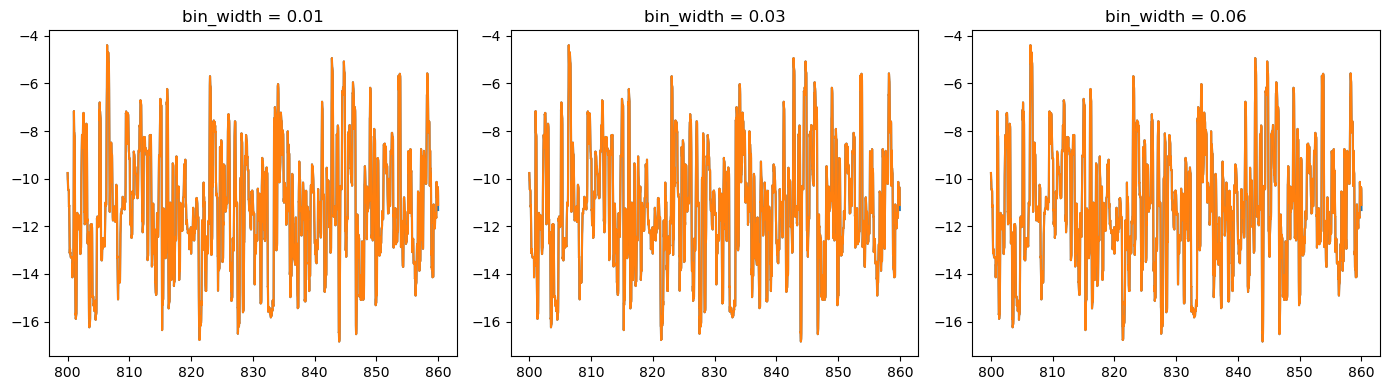

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=len(bin_widths), figsize=(14,4*1), layout='tight')

for idx, bin_width in enumerate(bin_widths):
    obs, raw_behavior, bin_centers, t = fin.construct_indy_data(fin.datasets["indy"][0])
    beh = fin.resample_behavior(raw_behavior, bin_centers, t)
    i = fin.prosvd_data(np.hstack([obs[10:], fin.zscore(beh, 10)]), 5, 20)
    o = fin.prosvd_data(beh, 1, 20)
    predicted, true = evaluate(i, o, auto_reg=True)
    predicted, true, t = fin.clip(predicted, true, t)
    
    mask = (800 < t) & (t < 860)
    ax[idx].plot(t[mask], true[mask])
    ax[idx].plot(t[mask], predicted[mask])
    ax[idx].set_title(f"{bin_width = }")

## Compare $\alpha$ and $\hat\alpha$

In [13]:
def do_regression(dataset, beh, method=1, nsteps=1, num=200):
    nsteps = 1
    alphas_shift = fin.bwrap_alphas_ahead(input_arr=dataset, bw_params=dict(bw.default_parameters.default_jpca_dataset_parameters, num=num), nsteps=nsteps)
    alphas_curr = fin.bwrap_alphas_ahead(input_arr=dataset, bw_params=dict(bw.default_parameters.default_jpca_dataset_parameters, num=num), nsteps=0)

    method = ['predicted current step', 'current step'][method]


    cut_beh = beh[-len(alphas_curr):]

    reg = bw.regressions.SymmetricNoisyRegressor(input_d=alphas_curr.shape[1], output_d=1)
    # reg = bw.regressions.NearestNeighborRegressor(input_d=alphas_curr.shape[1], output_d=1)
    preds = []
    cb = []
    for i in tqdm.tqdm(range(nsteps, len(alphas_curr)-2)):
        if method == 'predicted current step':
            reg.safe_observe(alphas_shift[i-nsteps], cut_beh[i])
        elif method == 'current step':
            reg.safe_observe(alphas_curr[i], cut_beh[i])


        preds.append(reg.predict(alphas_shift[i]))
        cb.append(cut_beh[i+nsteps])


    preds = np.squeeze(preds[np.nonzero(np.isfinite(preds))[0][0]:])[-1000:]
    cb = np.squeeze(cb)[-1000:]
    return preds, cb

100%|█| 2197/2197 [00:00<00:00, 4810.88i


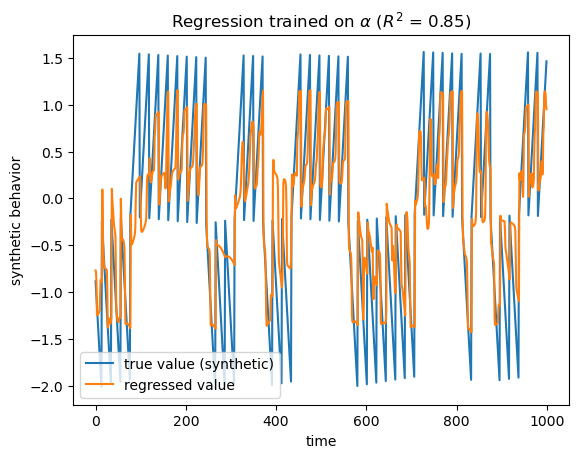

In [31]:
%matplotlib inline
fig, ax = plt.subplots()

p, t = do_regression(datasets['s3(z([s(neural), behavior]))'], datasets['z(behavior)'], method=1, num=60)

ax.plot(t)
ax.plot(p);
ax.set_xlabel('time')
ax.set_ylabel('synthetic behavior')
ax.set_title(f"Regression trained on $\\alpha$ ($R^2$ = {np.corrcoef(p,t)[0,1]:.2f})")
ax.legend(['true value (synthetic)', 'regressed value']);

100%|█| 2197/2197 [00:00<00:00, 3064.88i


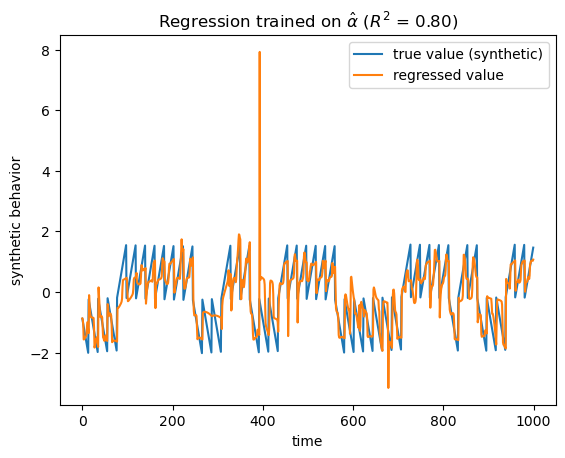

In [32]:
%matplotlib inline
fig, ax = plt.subplots()

p, t = do_regression(datasets['s3(z([s(neural), behavior]))'], datasets['z(behavior)'], method=0, num=60)

ax.plot(t)
ax.plot(p);
ax.set_xlabel('time')
ax.set_ylabel('synthetic behavior')
ax.set_title(f"Regression trained on $\\hat\\alpha$ ($R^2$ = {np.corrcoef(p,t)[0,1]:.2f})")
ax.legend(['true value (synthetic)', 'regressed value']);